In [1]:
library(tidyverse)

── Attaching packages ───────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library("DESeq2")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:tidyr’:

    expand


The following objects are masked from ‘pac

In [15]:
library("RColorBrewer")
library("pheatmap")

# Call DESeq2

Select ND and NFKB1 samples to compare

In [3]:
count_tbl <- read.csv(
    "../merge_peaks.raw_count.txt",
    sep="\t"
)

In [4]:
ND.samples <- colnames(count_tbl)[str_detect(colnames(count_tbl), "^ATAC.*ND")]
NFKB1.samples <- colnames(count_tbl)[str_detect(colnames(count_tbl), "^ATAC.*NFKB1")]

In [5]:
sample_count_tbl <- count_tbl[ 
    apply(count_tbl[, append(ND.samples, NFKB1.samples)], 1, function(x) any(as.logical(x))), 
    append(c("Chromosome", "Start", "End"), paste0("Count_", append(ND.samples, NFKB1.samples)))
]
peak_coor_as_name <- paste0(sample_count_tbl$Chromosome, ":", sample_count_tbl$Start, "-", sample_count_tbl$End)
sample_count_tbl <- sample_count_tbl[, 4:dim(sample_count_tbl)[2]]
rownames(sample_count_tbl) <- peak_coor_as_name
head(sample_count_tbl)

,Count_ATAC188_CB_FR062.1_ND_sB,Count_ATAC158_CB_FR052.1_ND_sB,Count_ATAC137_CB_FR045.1_ND_sB,Count_ATAC149_CB_FR049.1_ND_sB,Count_ATAC176_CB_FR058.1_ND_sB,Count_ATAC245_CB_FR081.1_ND_sB,Count_ATAC152_CB_FR050.1_ND_sB,Count_ATAC239_CB_FR079.1_ND_sB,Count_ATAC155_CB_FR051.1_ND_sB,Count_ATAC146_CB_FR048.1_ND_sB,⋯,Count_ATAC123_CB_FR040.1_ND_sB,Count_ATAC191_CB_FR063.1_ND_sB,Count_ATAC185_CB_FR061.1_ND_sB,Count_ATAC224_CB_FR075.1_ND_sB,Count_ATAC111_CB_FR036.1_NFKB1_sB,Count_ATAC295_BG_FR100.1_NFKB1_sB,Count_ATAC301_BG_FR102.1_NFKB1_sB,Count_ATAC074_CB_FR023.1_NFKB1_sB,Count_ATAC304_BG_FR103.1_NFKB1_sB,Count_ATAC298_BG_FR101.1_NFKB1_sB
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
chr1:10043-10267,15,7,9,10,8,13,14,12,13,8,⋯,14,15,11,13,9,6,8,11,8,12
chr1:180704-180974,17,7,11,9,5,16,12,20,12,9,⋯,12,11,14,8,12,9,9,13,9,13
chr1:181330-181577,18,14,9,7,13,17,8,16,11,16,⋯,8,15,12,14,10,3,0,4,3,2
chr1:629820-630076,51,46,55,54,53,37,51,56,53,54,⋯,50,56,51,55,53,55,59,51,62,62
chr1:630217-630417,1,0,7,1,2,1,0,3,3,72,⋯,2,1,2,2,0,2,3,4,6,3
chr1:630514-630684,0,2,51,0,3,0,4,5,3,1,⋯,0,1,1,1,1,0,1,1,0,3


In [6]:
coldata<-as.data.frame(append(
    rep(c("ND"), length(ND.samples)),
    rep(c("NFKB1"), length(NFKB1.samples))
))
rownames(coldata) <- colnames(sample_count_tbl) 
colnames(coldata) <- "condition"
coldata$condition <- factor(coldata$condition)

In [7]:
coldata

,condition
,<fct>
Count_ATAC188_CB_FR062.1_ND_sB,ND
Count_ATAC158_CB_FR052.1_ND_sB,ND
Count_ATAC137_CB_FR045.1_ND_sB,ND
Count_ATAC149_CB_FR049.1_ND_sB,ND
Count_ATAC176_CB_FR058.1_ND_sB,ND
Count_ATAC245_CB_FR081.1_ND_sB,ND
Count_ATAC152_CB_FR050.1_ND_sB,ND
Count_ATAC239_CB_FR079.1_ND_sB,ND
Count_ATAC155_CB_FR051.1_ND_sB,ND


DESeq2 call significant different peaks

In [8]:
dds <- DESeqDataSetFromMatrix(countData = sample_count_tbl,
                              colData = coldata,
                              design = ~ condition)
dds

class: DESeqDataSet 
dim: 88870 24 
metadata(1): version
assays(1): counts
rownames(88870): chr1:10043-10267 chr1:180704-180974 ...
  chrY:56837247-56837352 chrY:56870861-56871030
rowData names(0):
colnames(24): Count_ATAC188_CB_FR062.1_ND_sB
  Count_ATAC158_CB_FR052.1_ND_sB ... Count_ATAC304_BG_FR103.1_NFKB1_sB
  Count_ATAC298_BG_FR101.1_NFKB1_sB
colData names(1): condition

In [9]:
dds <- DESeq(dds)
res <- results(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 29 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [10]:
summary(res)


out of 88870 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 5347, 6%
LFC < 0 (down)     : 4350, 4.9%
outliers [1]       : 18, 0.02%
low counts [2]     : 5166, 5.8%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



# Sample Cluster

In [11]:
rld <- rlog(dds, blind=FALSE)

In [12]:
sampleDists <- dist(t(assay(rld)))

In [23]:
rld@colData

DataFrame with 24 rows and 3 columns
                                  condition sizeFactor replaceable
                                   <factor>  <numeric>   <logical>
Count_ATAC188_CB_FR062.1_ND_sB           ND   1.332158        TRUE
Count_ATAC158_CB_FR052.1_ND_sB           ND   1.124453        TRUE
Count_ATAC137_CB_FR045.1_ND_sB           ND   1.094496        TRUE
Count_ATAC149_CB_FR049.1_ND_sB           ND   0.982286        TRUE
Count_ATAC176_CB_FR058.1_ND_sB           ND   1.085894        TRUE
...                                     ...        ...         ...
Count_ATAC295_BG_FR100.1_NFKB1_sB     NFKB1   0.791924       FALSE
Count_ATAC301_BG_FR102.1_NFKB1_sB     NFKB1   0.891629       FALSE
Count_ATAC074_CB_FR023.1_NFKB1_sB     NFKB1   0.834041       FALSE
Count_ATAC304_BG_FR103.1_NFKB1_sB     NFKB1   1.174311       FALSE
Count_ATAC298_BG_FR101.1_NFKB1_sB     NFKB1   1.224546       FALSE

In [27]:
rld

class: DESeqTransform 
dim: 88870 24 
metadata(1): version
assays(1): ''
rownames(88870): chr1:10043-10267 chr1:180704-180974 ...
  chrY:56837247-56837352 chrY:56870861-56871030
rowData names(24): baseMean baseVar ... replace rlogIntercept
colnames(24): Count_ATAC188_CB_FR062.1_ND_sB
  Count_ATAC158_CB_FR052.1_ND_sB ... Count_ATAC304_BG_FR103.1_NFKB1_sB
  Count_ATAC298_BG_FR101.1_NFKB1_sB
colData names(3): condition sizeFactor replaceable

In [31]:
rownames(rld@colData)

[1] "Count_ATAC188_CB_FR062.1_ND_sB"    "Count_ATAC158_CB_FR052.1_ND_sB"   
 [3] "Count_ATAC137_CB_FR045.1_ND_sB"    "Count_ATAC149_CB_FR049.1_ND_sB"   
 [5] "Count_ATAC176_CB_FR058.1_ND_sB"    "Count_ATAC245_CB_FR081.1_ND_sB"   
 [7] "Count_ATAC152_CB_FR050.1_ND_sB"    "Count_ATAC239_CB_FR079.1_ND_sB"   
 [9] "Count_ATAC155_CB_FR051.1_ND_sB"    "Count_ATAC146_CB_FR048.1_ND_sB"   
[11] "Count_ATAC206_CB_FR069.1_ND_sB"    "Count_ATAC143_CB_FR047.1_ND_sB"   
[13] "Count_ATAC140_CB_FR046.1_ND_sB"    "Count_ATAC194_CB_FR064.1_ND_sB"   
[15] "Count_ATAC123_CB_FR040.1_ND_sB"    "Count_ATAC191_CB_FR063.1_ND_sB"   
[17] "Count_ATAC185_CB_FR061.1_ND_sB"    "Count_ATAC224_CB_FR075.1_ND_sB"   
[19] "Count_ATAC111_CB_FR036.1_NFKB1_sB" "Count_ATAC295_BG_FR100.1_NFKB1_sB"
[21] "Count_ATAC301_BG_FR102.1_NFKB1_sB" "Count_ATAC074_CB_FR023.1_NFKB1_sB"
[23] "Count_ATAC304_BG_FR103.1_NFKB1_sB" "Count_ATAC298_BG_FR101.1_NFKB1_sB"

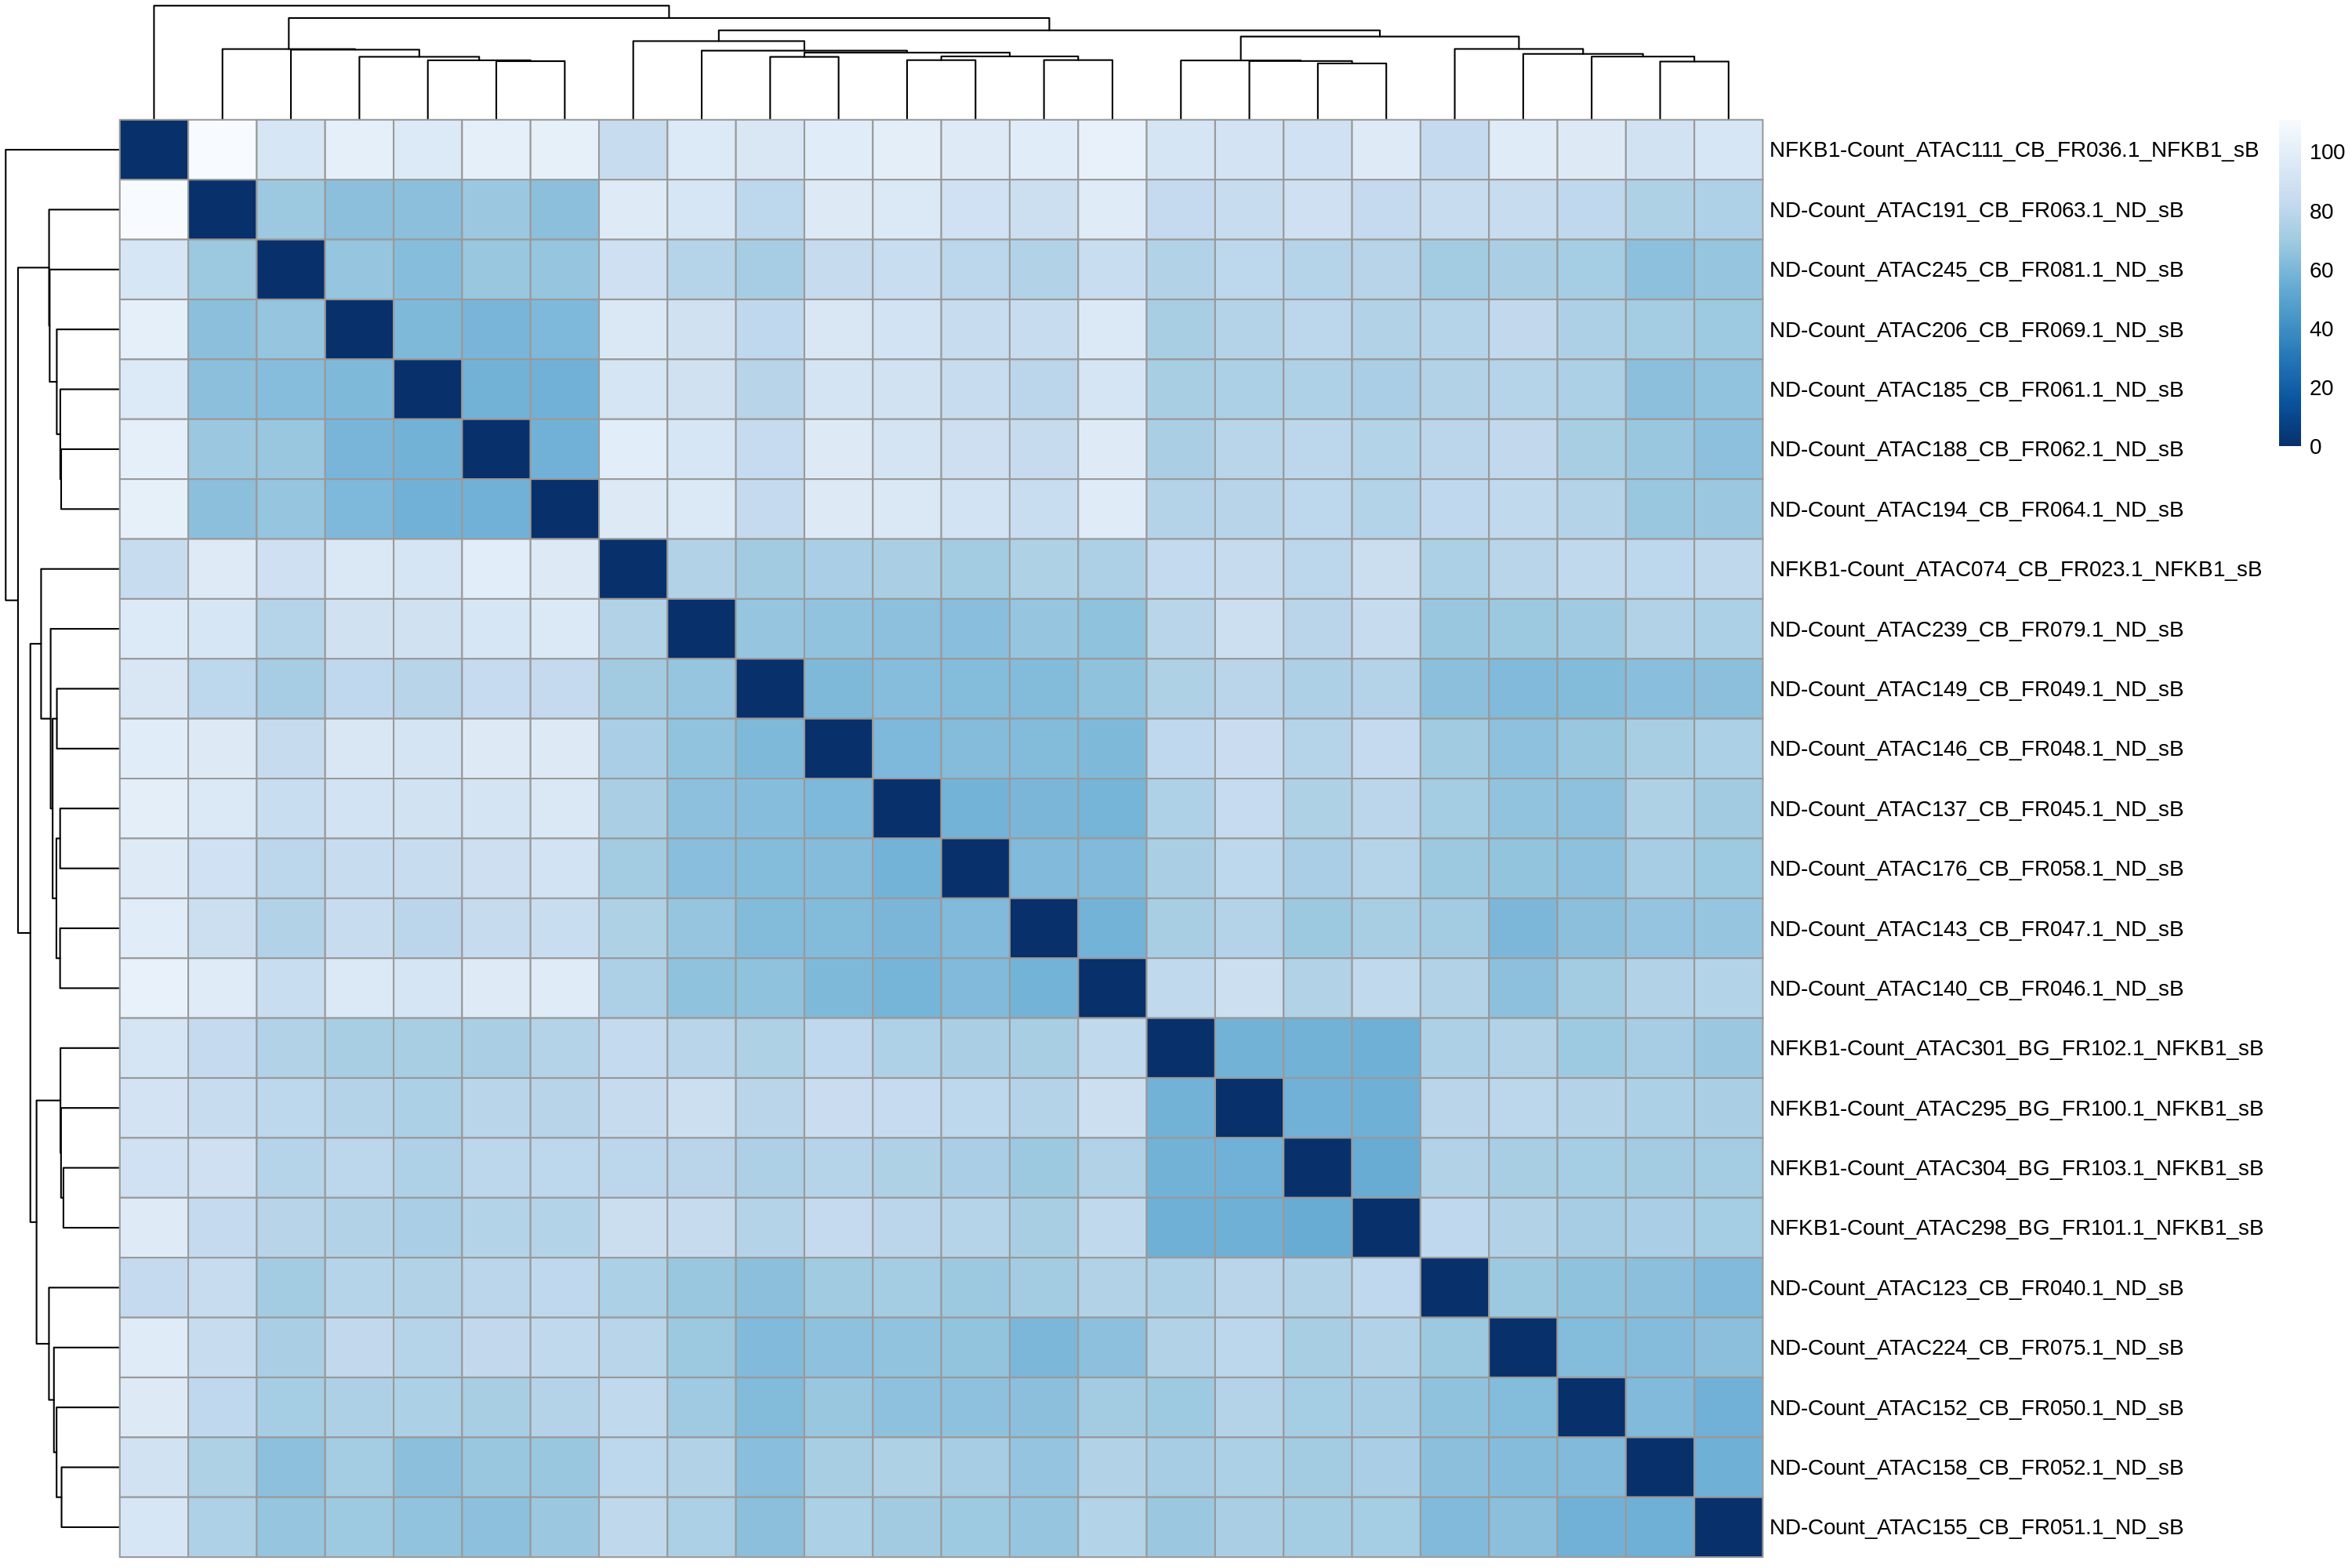

In [34]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 200)
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(rld$condition, rownames(rld@colData), sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

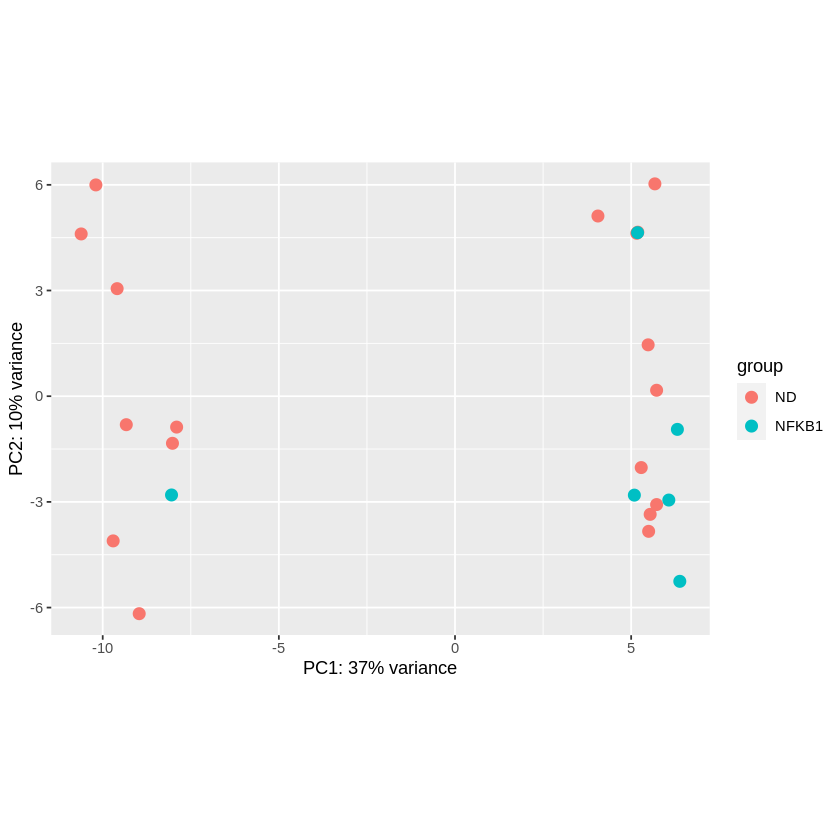

In [18]:
plotPCA(rld, intgroup=c("condition"))

Down regulated in NFKB1, q < 0.1

In [33]:
res_tbl <- as.data.frame(res)
diff_peaks <- na.omit(res_tbl[res$padj < 0.1, ])
dim(diff_peaks)[1]

[1] 9697

In [25]:
write.table(diff_peaks, file="NFKB1_vs_ND_padj_0.1_Peaks.csv", sep="\t", quote = FALSE)

In [26]:
down_peaks <- diff_peaks[diff_peaks$log2FoldChange < 0, ]

In [27]:
down_peak_bed <- t(
    as.data.frame(
        map(rownames(down_peaks), function(x) strsplit(x, ":|-"))
    )
)

In [28]:
write.table(down_peak_bed, file="NFKB1_vs_ND_padj_0.1_NFKB1_Down_Peaks.csv", row.names = FALSE, col.names = FALSE, sep="\t", quote = FALSE)

Call motif use homer

In [29]:
system2(
    "findMotifsGenome.pl",
    args = c("NFKB1_vs_ND_padj_0.1_NFKB1_Down_Peaks.csv", "hg38", "NFKB1_vs_ND_padj_0.1_NFKB1_Down_Peaks.homer_Motif/", 
             "-size", "200", "-mask", "-preparsedDir", "delete", "-p", "15"),
    stdout="call_motif.log",
    stderr="call_motif.log",
    wait=TRUE,
)

Down regulated in NFKB1, q < 0.01

In [34]:
res_tbl <- as.data.frame(res)
diff_peaks <- na.omit(res_tbl[res$padj < 0.01, ])
dim(diff_peaks)[1]

[1] 2296

In [35]:
write.table(diff_peaks, file="NFKB1_vs_ND_padj_0.01_Peaks.csv", sep="\t", quote = FALSE)

Down regulated in NFKB1

In [38]:
down_peaks <- diff_peaks[diff_peaks$log2FoldChange < 0, ]

In [39]:
down_peak_bed <- t(
    as.data.frame(
        map(rownames(down_peaks), function(x) strsplit(x, ":|-"))
    )
)

In [40]:
write.table(down_peak_bed, file="NFKB1_vs_ND_padj_0.01_NFKB1_Down_Peaks.csv", row.names = FALSE, col.names = FALSE, sep="\t", quote = FALSE)

In [41]:
system2(
    "findMotifsGenome.pl",
    args = c("NFKB1_vs_ND_padj_0.01_NFKB1_Down_Peaks.csv", "hg38", "NFKB1_vs_ND_padj_0.01_NFKB1_Down_Peaks.homer_Motif/", 
             "-size", "200", "-mask", "-preparsedDir", "delete", "-p", "15"),
    stdout="call_motif.log",
    stderr="call_motif.log",
    wait=TRUE,
)

Down regulated in NFKB1, 1.5 fold

In [43]:
down_peaks <- diff_peaks[diff_peaks$log2FoldChange < -log2(1.5), ]

In [47]:
down_peak_bed <- t(
    as.data.frame(
        map(rownames(down_peaks), function(x) strsplit(x, ":|-"))
    )
)

In [48]:
write.table(down_peak_bed, file="NFKB1_vs_ND_padj_0.01_fc1.5_NFKB1_Down_Peaks.csv", row.names = FALSE, col.names = FALSE, sep="\t", quote = FALSE)

In [49]:
system2(
    "findMotifsGenome.pl",
    args = c("NFKB1_vs_ND_padj_0.01_fc1.5_NFKB1_Down_Peaks.csv", "hg38", "NFKB1_vs_ND_padj_0.01_fc1.5_NFKB1_Down_Peaks.homer_Motif/", 
             "-size", "200", "-mask", "-preparsedDir", "delete", "-p", "15"),
    stdout="call_motif.log",
    stderr="call_motif.log",
    wait=TRUE,
)

Up regulated in NFKB1

In [50]:
res_tbl <- as.data.frame(res)
diff_peaks <- na.omit(res_tbl[res$padj < 0.1, ])
dim(diff_peaks)[1]

[1] 9697

In [51]:
up_peaks <- diff_peaks[diff_peaks$log2FoldChange > 0, ]

In [52]:
up_peak_bed <- t(
    as.data.frame(
        map(rownames(up_peaks), function(x) strsplit(x, ":|-"))
    )
)
dim(up_peak_bed)

[1] 5347    3

In [53]:
write.table(up_peak_bed, file="NFKB1_vs_ND_padj_0.1_NFKB1_Up_Peaks.csv", row.names = FALSE, col.names = FALSE, sep="\t", quote = FALSE)

Call motif use homer

In [54]:
system2(
    "findMotifsGenome.pl",
    args = c("NFKB1_vs_ND_padj_0.1_NFKB1_Up_Peaks.csv", "hg38", "NFKB1_vs_ND_padj_0.1_NFKB1_Up_Peaks.homer_Motif/", 
             "-size", "200", "-mask", "-preparsedDir", "delete", "-p", "15"),
    stdout="call_motif.log",
    stderr="call_motif.log",
    wait=TRUE,
)

Up regulated in NFKB1

In [55]:
res_tbl <- as.data.frame(res)
diff_peaks <- na.omit(res_tbl[res$padj < 0.01, ])
dim(diff_peaks)[1]

[1] 2296

In [56]:
up_peaks <- diff_peaks[diff_peaks$log2FoldChange > 0, ]

In [57]:
up_peak_bed <- t(
    as.data.frame(
        map(rownames(up_peaks), function(x) strsplit(x, ":|-"))
    )
)
dim(up_peak_bed)

[1] 1403    3

In [58]:
write.table(up_peak_bed, file="NFKB1_vs_ND_padj_0.01_NFKB1_Up_Peaks.csv", row.names = FALSE, col.names = FALSE, sep="\t", quote = FALSE)

Call motif use homer

In [59]:
system2(
    "findMotifsGenome.pl",
    args = c("NFKB1_vs_ND_padj_0.01_NFKB1_Up_Peaks.csv", "hg38", "NFKB1_vs_ND_padj_0.01_NFKB1_Up_Peaks.homer_Motif/", 
             "-size", "200", "-mask", "-preparsedDir", "delete", "-p", "15"),
    stdout="call_motif.log",
    stderr="call_motif.log",
    wait=TRUE,
)

1.5 fold

In [61]:
up_peaks <- diff_peaks[diff_peaks$log2FoldChange > log2(1.5), ]

In [62]:
up_peak_bed <- t(
    as.data.frame(
        map(rownames(up_peaks), function(x) strsplit(x, ":|-"))
    )
)
dim(up_peak_bed)

[1] 582   3

In [63]:
write.table(up_peak_bed, file="NFKB1_vs_ND_padj_0.01_fc1.5_NFKB1_Up_Peaks.csv", row.names = FALSE, col.names = FALSE, sep="\t", quote = FALSE)

Call motif use homer

In [64]:
system2(
    "findMotifsGenome.pl",
    args = c("NFKB1_vs_ND_padj_0.01_fc1.5_NFKB1_Up_Peaks.csv", "hg38", "NFKB1_vs_ND_padj_0.01_fc1.5_NFKB1_Up_Peaks.homer_Motif/", 
             "-size", "200", "-mask", "-preparsedDir", "delete", "-p", "15"),
    stdout="call_motif.log",
    stderr="call_motif.log",
    wait=TRUE,
)